In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/JIAPK.csv')

In [ ]:
df.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,PKM00041780,"JINNAH INTERNATIONAL, PK",2021-01-01,60,NaN,NaN
1,PKM00041780,"JINNAH INTERNATIONAL, PK",2021-01-02,60,NaN,NaN
2,PKM00041780,"JINNAH INTERNATIONAL, PK",2021-01-03,62,NaN,NaN
3,PKM00041780,"JINNAH INTERNATIONAL, PK",2021-01-04,63,NaN,NaN
4,PKM00041780,"JINNAH INTERNATIONAL, PK",2021-01-05,67,NaN,NaN


In [ ]:
df.dtypes

STATION     object
NAME        object
DATE        object
TAVG         int64
TMAX       float64
TMIN       float64
dtype: object

<Axes: >

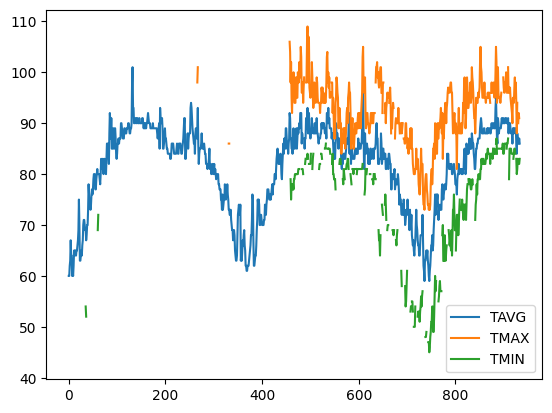

In [ ]:
df.plot()

In [ ]:
df.isnull().sum()

STATION      0
NAME         0
DATE         0
TAVG         0
TMAX       461
TMIN       565
dtype: int64

In [ ]:
df.Date = pd.to_datetime(df.DATE, dayfirst = True)
df.set_index("DATE", inplace=True)

<ipython-input-8-b22ee57c1aa1>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Date = pd.to_datetime(df.DATE, dayfirst = True)


In [ ]:
df["TAVG"] = df["TAVG"].astype("float64")
df

,STATION,NAME,TAVG,TMAX,TMIN
DATE,,,,,
2021-01-01,PKM00041780,"JINNAH INTERNATIONAL, PK",60.0,NaN,NaN
2021-01-02,PKM00041780,"JINNAH INTERNATIONAL, PK",60.0,NaN,NaN
2021-01-03,PKM00041780,"JINNAH INTERNATIONAL, PK",62.0,NaN,NaN
2021-01-04,PKM00041780,"JINNAH INTERNATIONAL, PK",63.0,NaN,NaN
2021-01-05,PKM00041780,"JINNAH INTERNATIONAL, PK",67.0,NaN,NaN
...,...,...,...,...,...
2023-07-27,PKM00041780,"JINNAH INTERNATIONAL, PK",87.0,NaN,83.0
2023-07-28,PKM00041780,"JINNAH INTERNATIONAL, PK",86.0,90.0,82.0
2023-07-29,PKM00041780,"JINNAH INTERNATIONAL, PK",86.0,92.0,82.0


In [ ]:
null_pct = df.apply(pd.isnull).sum()/df.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
TAVG       0.000000
TMAX       0.493576
TMIN       0.604925
dtype: float64

In [ ]:
df.drop(["STATION", "NAME","TMAX", "TMIN"], axis=1, inplace=True)

<Axes: xlabel='DATE'>

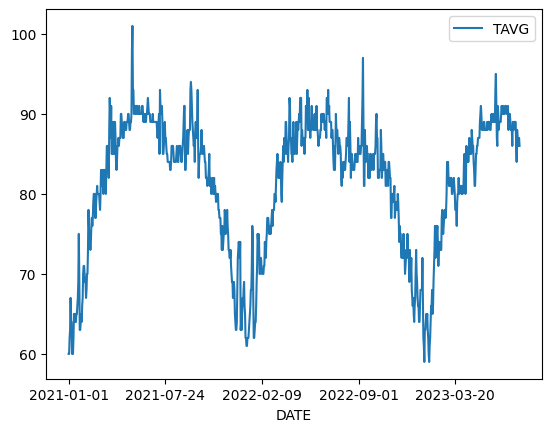

In [ ]:
df.plot()

In [ ]:
df

,TAVG
DATE,
2021-01-01,60.0
2021-01-02,60.0
2021-01-03,62.0
2021-01-04,63.0
2021-01-05,67.0
...,...
2023-07-27,87.0
2023-07-28,86.0
2023-07-29,86.0


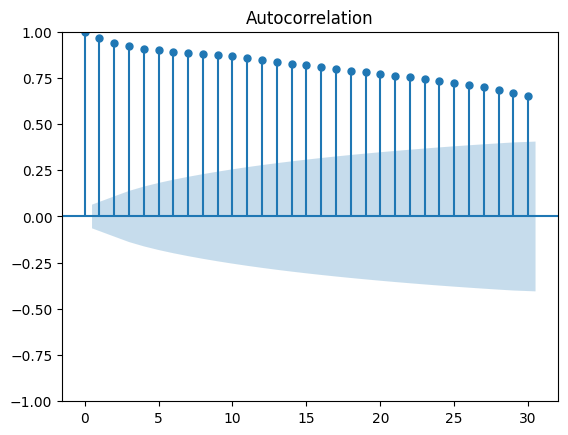

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)
plt.show()

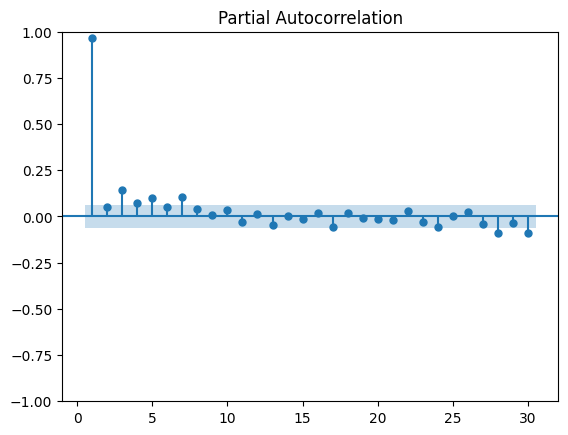

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df,zero=False)
plt.show()

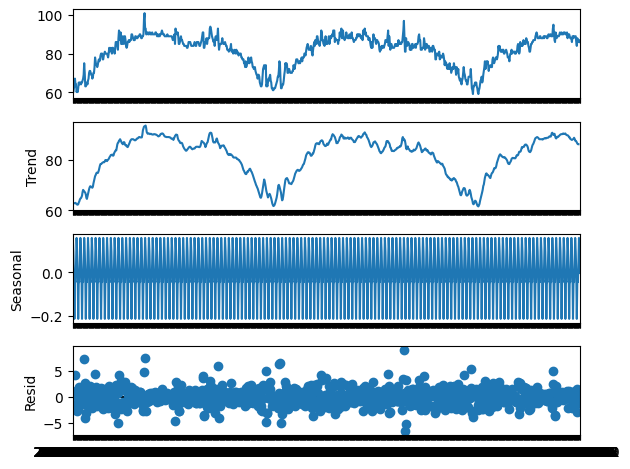

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = df
result = seasonal_decompose(series, model='additive',period=7)
result.plot()
pyplot.show()

In [ ]:
x = df.values
split = round(len(x)/2)
x1 = x[0:split]
x2 = x[split:]
print("Mean1 =%f" % x1.mean())
print("Mean2 =%f" % x2.mean())
print("Variance1 =%f" % x1.var())
print("Variance2 =%f" % x2.var())

Mean1 =80.284797
Mean2 =82.526767
Variance1 =79.043088
Variance2 =58.035151


In [ ]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(x)
results
print("ADF Statistics: %f" % results[0])
print("p-value: %f" % results[1])
print("Critical Values: ")
for key , values in results[4].items():
  print( "\t%s: %f" % (key , values))
if (results[1]>0.05):
  print("Series is not stationary")
else:
  print("Series is stationary")

ADF Statistics: -2.563183
p-value: 0.100848
Critical Values: 
	1%: -3.437447
	5%: -2.864673
	10%: -2.568438
Series is not stationary


In [ ]:
from statsmodels.tsa.stattools import kpss
result = kpss(df)
print("p-values are: %f " % result[1])

p-values are: 0.100000 


<ipython-input-19-a6ec2ba704c2>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df)


In [ ]:
# !pip install pmdarima

In [ ]:
# from pmdarima import auto_arima
# stepwise_fit = auto_arima(df['TAVG'], trace=True,
# suppress_warnings=True)

In [ ]:
# size = int(len(df)*0.8)
# df, df_test = df.iloc[:size], df.iloc[size:]

In [ ]:
# model=ARIMA(df,order=(2,1,3),seasonal_order=(1,1,1,30))

In [ ]:
# result = model.fit()

In [ ]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# # predictions = result.predict(start=len(df+1), end= len(df)+len(df_test)-1, dynamic=False)

# rmse = sqrt(mean_squared_error(df_test.TAVG, predictions))
# print('Test RMSE: %.3f' % rmse)

In [ ]:
# test=pd.DataFrame({'Actual':df_test['TAVG'].values,'Forecast':predictions})

In [ ]:
# test.set_index(df_test.index,inplace=True)

In [ ]:
# test.plot(kind='line',figsize=(10,5))

In [ ]:
def train_test_split(data, n_train):
    return data[0:n_train], data[n_train:]

In [ ]:
import pickle
def evaluate_arima_model(data, arima_order, train_data_size_percent = 0.8):
  # prepare training dataset
    train_size = int(len(data) * train_data_size_percent)
    train, test = train_test_split(data, train_size)
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        with open('model.pkl', 'wb') as f:
          pickle.dump(model, f)
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error, test, predictions

In [ ]:
mse, test, predictions = evaluate_arima_model(df['TAVG'], arima_order=(1, 1, 1))

In [ ]:
df["TAVG"].dtypes

dtype('float64')

In [ ]:
print("RMSE :",sqrt(mse))

RMSE : 1.5671159324480435


In [ ]:
result=pd.DataFrame({"Actual":test,"Forecast":predictions},index=test.index)

In [ ]:
result

,Actual,Forecast
DATE,,
2023-01-26,61.0,59.864270
2023-01-27,62.0,61.318442
2023-01-28,64.0,62.062782
2023-01-29,66.0,63.644142
2023-01-30,66.0,65.296019
...,...,...
2023-07-27,87.0,87.919586
2023-07-28,86.0,87.128302
2023-07-29,86.0,86.301765


<Axes: xlabel='DATE'>

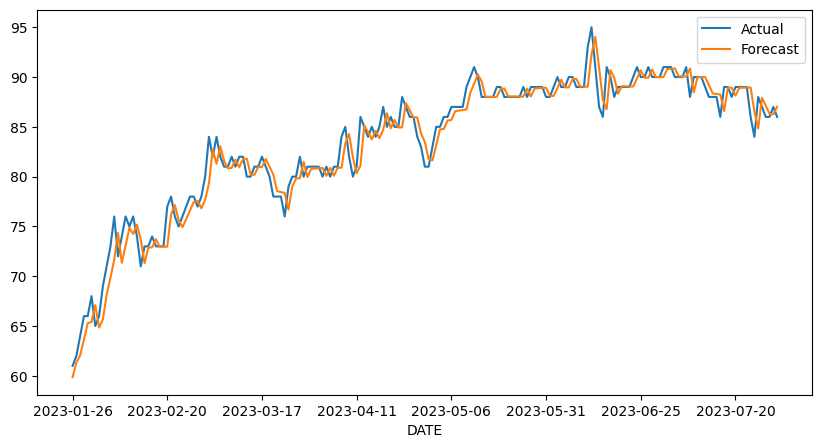

In [ ]:
result.plot(kind='line',figsize=(10,5))

In [ ]:
# Temperature range	Summary
# 1-20°F	Snow
# 21-32°F	Freezing
# 33-50°F	Cold
# 51-68°F	Cool
# 69-86°F	Warm
# 87-95°F	Hot
# 96°F and above	Very hot

In [ ]:
dicti = {
    "snowy":[x for x in range(1,21)],
    "stormy" : [x for x in range(21,33)],
    "cloudy": [x for x in range(33,69)],
    "warm" : [x for x in range(69,87)],
    "sunny": [x for x in range(87,200)],
}
dicti

{'snowy': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20],
 'stormy': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 'cloudy': [33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68],
 'warm': [69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86],
 'sunny': [87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  

In [ ]:
result
def find_key_by_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None
lis = []

for x in result.Forecast.values:
  for y in dicti.values():
    if int(x) in y:
      lis.append(find_key_by_value(dicti,y))

In [ ]:
result['Summaries'] = lis

In [ ]:
result


,Actual,Forecast,Summaries
DATE,,,
2023-01-26,61.0,59.864270,cloudy
2023-01-27,62.0,61.318442,cloudy
2023-01-28,64.0,62.062782,cloudy
2023-01-29,66.0,63.644142,cloudy
2023-01-30,66.0,65.296019,cloudy
...,...,...,...
2023-07-27,87.0,87.919586,sunny
2023-07-28,86.0,87.128302,sunny
2023-07-29,86.0,86.301765,warm


In [ ]:
result

,Actual,Forecast,Summaries
DATE,,,
2023-01-26,61.0,59.864270,cloudy
2023-01-27,62.0,61.318442,cloudy
2023-01-28,64.0,62.062782,cloudy
2023-01-29,66.0,63.644142,cloudy
2023-01-30,66.0,65.296019,cloudy
...,...,...,...
2023-07-27,87.0,87.919586,sunny
2023-07-28,86.0,87.128302,sunny
2023-07-29,86.0,86.301765,warm


In [ ]:
result.Summaries.value_counts()

warm      100
sunny      77
cloudy     10
Name: Summaries, dtype: int64